<a href="https://colab.research.google.com/github/IndioP/Projeto-AM/blob/main/Avila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IndioP/Projeto-AM

Cloning into 'Projeto-AM'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 538.90 KiB | 2.16 MiB/s, done.


In [2]:
import pandas as pd

In [3]:
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
df = pd.read_csv("Projeto-AM/avila-tr.txt",names = names)

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_valid,y_train,y_valid = train_test_split(df.drop("Class",axis=1), df["Class"],test_size=0.2)

In [7]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((8344, 10), (8344,), (2086, 10), (2086,))

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [10]:
df = pd.read_csv("Projeto-AM/avila-ts.txt",names=names)

In [11]:
X_test = df.drop("Class",axis=1)
y_test = df["Class"]

In [12]:
models = [DecisionTreeClassifier, GaussianNB, LogisticRegression, KNeighborsClassifier]
models_names = ["DecisionTreeClassifier", "GaussianNB", "LogisticRegression", "KNeighborsClassifier"]
for model,name in zip(models,models_names):
  print(f'model ',name)
  clf = model()
  clf.fit(X_train,y_train)
  
  print("acuracia =",clf.score(X_valid,y_valid))
  
  pred = clf.predict(X_valid)
  print("f1",f1_score(pred,y_valid,average="weighted"))
  print("recall",recall_score(pred,y_valid,average="weighted"))
  print("precision",precision_score(pred,y_valid,average="weighted"))
  print("-"*100)

model  DecisionTreeClassifier
acuracia = 0.9702780441035475
f1 0.9700999628374022
recall 0.9702780441035475
precision 0.9702369345663672
----------------------------------------------------------------------------------------------------
model  GaussianNB
acuracia = 0.32550335570469796
f1 0.33086240747690326
recall 0.32550335570469796
precision 0.5022278942641912
----------------------------------------------------------------------------------------------------
model  LogisticRegression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


acuracia = 0.5695110258868649
f1 0.652666504922653
recall 0.5695110258868649
precision 0.8355659496143726
----------------------------------------------------------------------------------------------------
model  KNeighborsClassifier
acuracia = 0.7176414189837008
f1 0.7235339308087793
recall 0.7176414189837008
precision 0.7404064477124386
----------------------------------------------------------------------------------------------------


In [13]:
pred = clf.predict(X_test)
print("f1",f1_score(pred,y_test,average="weighted"))
print("recall",recall_score(pred,y_test,average="weighted"))
print("precision",precision_score(pred,y_test,average="weighted"))

f1 0.7379566611494753
recall 0.7323943661971831
precision 0.7553533568220944


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 6.3 MB/s eta 0:00:00


# DecisionTreeClassifier parameters

In [ ]:
criterion = "gini" #What is the criterion used for the split
#There is an scientific paper comparing gini and entropy and they diverge in only 2% of the cases, but entropy is a little slower because of logarithm

splitter = "best" #The strategy used to choose the split at each node
#If the model is suffering from overfitting we can change it to random, to avoid this fate

max_depth = None #can be None to go forever till purity beeing achieved

min_samples_split = 2 #if int, it is the minimal number to make a split
                      #if float, it is the min_samples_split * n_samples

min_samples_leaf = 1 #int, float

#min_weight_fraction_leaf = 

max_features = None #there are few features, so I think

In [ ]:
from sklearn.utils.extmath import weighted_mode
import optuna



def objective(trial):
    min_samples_split = trial.suggest_int("min_samples_split",2,50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",1,30)
    
    clf = DecisionTreeClassifier(
                                #criterion=criterion,
                                #splitter=splitter,
                                min_samples_split=min_samples_split,
                                #max_depth=max_depth, 
                                #min_samples_leaf=min_samples_leaf, 
                                max_features=max_features
                                )
    clf.fit(X_train,y_train)
    pred = clf.predict(X_valid)
    return f1_score(pred,y_valid,average="weighted")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2023-02-15 04:07:26,558] A new study created in memory with name: no-name-3563c78c-f2aa-4ab2-a811-0b76dbfe3271
[I 2023-02-15 04:07:26,653] Trial 0 finished with value: 0.7843459221056069 and parameters: {'min_samples_split': 29, 'min_samples_leaf': 30}. Best is trial 0 with value: 0.7843459221056069.
[I 2023-02-15 04:07:26,734] Trial 1 finished with value: 0.8168443551952949 and parameters: {'min_samples_split': 19, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.8168443551952949.
[I 2023-02-15 04:07:26,838] Trial 2 finished with value: 0.7726110571160898 and parameters: {'min_samples_split': 30, 'min_samples_leaf': 21}. Best is trial 1 with value: 0.8168443551952949.
[I 2023-02-15 04:07:26,940] Trial 3 finished with value: 0.819542710821096 and parameters: {'min_samples_split': 47, 'min_samples_leaf': 11}. Best is trial 3 with value: 0.819542710821096.
[I 2023-02-15 04:07:27,022] Trial 4 finished with value: 0.8378032043142403 and parameters: {'min_samples_split': 16, 'min_s

KeyboardInterrupt: ignored

# Naive Bayes

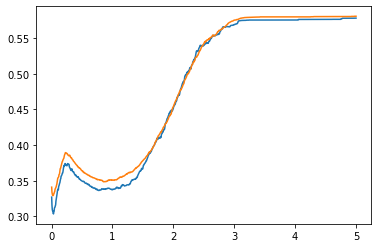

In [19]:
import numpy as np
import matplotlib.pyplot as plt

results_val = []
results_train = []
x = np.linspace(1e-3,5,1000) #unico parametro que parece ser relevante????
for i in x:
  clf = GaussianNB(var_smoothing = i)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

plt.plot(x,results_val,label='val')
plt.plot(x,results_train,label='train')

In [20]:
clf = GaussianNB(var_smoothing = 3)
clf.fit(X_train,y_train)
print("acuracia =",clf.score(X_valid,y_valid))

pred = clf.predict(X_valid)
print("f1",f1_score(pred,y_valid,average="weighted"))
print("recall",recall_score(pred,y_valid,average="weighted"))
print("precision",precision_score(pred,y_valid,average="weighted"))
print("-"*100)

acuracia = 0.41083413231064236
f1 0.5688927350446688
recall 0.41083413231064236
precision 0.9596600957668628
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusão:
**Com essa modificação no var_smoothing de 1e-9 para 3 o modelo teve ganhos significativos em todas as metricas**